<h1 align='center' style='color:red'><em>Author : Sumit Mohod</em></h1>

---

<blockquote>Data Science and Business Analytics internship</blockquote>

<blockquote>The Sparks Foundation GRIP</blockquote>

<blockquote>Batch : December 2020</blockquote>

<blockquote>Task 2: Prediction using Unsupervised ML</blockquote>

---

<h1>Unsupervised ML using K-Means Clustering</h1>

<p>In this Unsupervised ML task, we are given iris dataset. For performing ML algorithm, we have to assume the dataset without labels and then predict the optimum number of clusters. For this Unsupervised ML task, I have chosen 'K-Means clustering' algorithm.</p>

<blockquote><B>Task Objective</B> : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.</blockquote>

<blockquote><h4>About Iris Dataset:</h4>
<center><img src='https://www.integratedots.com/wp-content/uploads/2019/06/iris_petal-sepal-e1560211020463.png'></center>
<p>Iris flower data set was introduced by the British statistician and biologist Ronald Fisher in 1936. Iris data set gives the measurements in centimetres of the variables sepal length and width and petal length and width, respectively, for 50 flowers from each of 3 species of iris. The species are Iris <b>setosa</b>, <b>versicolor</b>, and <b>virginica</b>.</p>
    
There are 4 features: 
<OL>
    <li><b>sepalLength</b>: sepal length in cm</li>
    <li><b>sepalWidth</b>: sepal width in cm</li>
    <li><b>petalLength</b>: petal length in cm</li>
    <li><b>petalWidth</b>: petal width in cm</li>
</OL>
    
There are 3 classes representing class label of iris flower species 
<OL>
    <li>Iris Setosa</li>
    <li>Iris Versicolour</li>
    <li>Iris Virginica</li>
</OL>    
</blockquote> 
<br><br>

<center><img src='iris_classification.jpg' width='750' height='300'></center>

---

In [1]:
# First I am importing the important libraries required in this notebook
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the iris dataset
iris_df = sns.load_dataset('iris')
iris_df.head() # See the first 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
print('The size of Dataframe is: ', iris_df.shape)
print('\n')
iris_df.info()

The size of Dataframe is:  (150, 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# To find total_missing_values in different columns of data and their percentage
def missing_data(data):
    """
    This will take in a dataframe and 
    finds the total_missing_values as well as percentage of the value counts
    """
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [5]:
missing_data(data= iris_df)

,Total,Percent
species,0,0.0
petal_width,0,0.0
petal_length,0,0.0
sepal_width,0,0.0
sepal_length,0,0.0


As from above dataframe, my observation on missing data are: 
<UL>
   <li>There is no missing values in our dataset.
   <li>Therefore there is no need of data cleaning.
</UL>

In [6]:
# To find descriptive statistic summary on the data I used function below:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Visualization

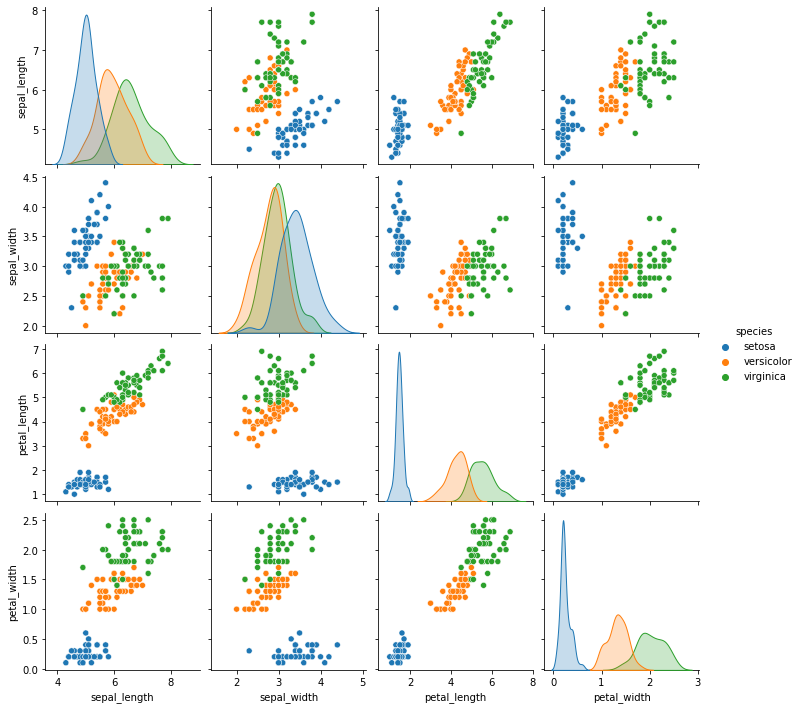

In [7]:
# Here, I produced a pairplot to look at these characteristics for each class using scatterplots. 

sns.pairplot(data= iris_df, hue= 'species')       

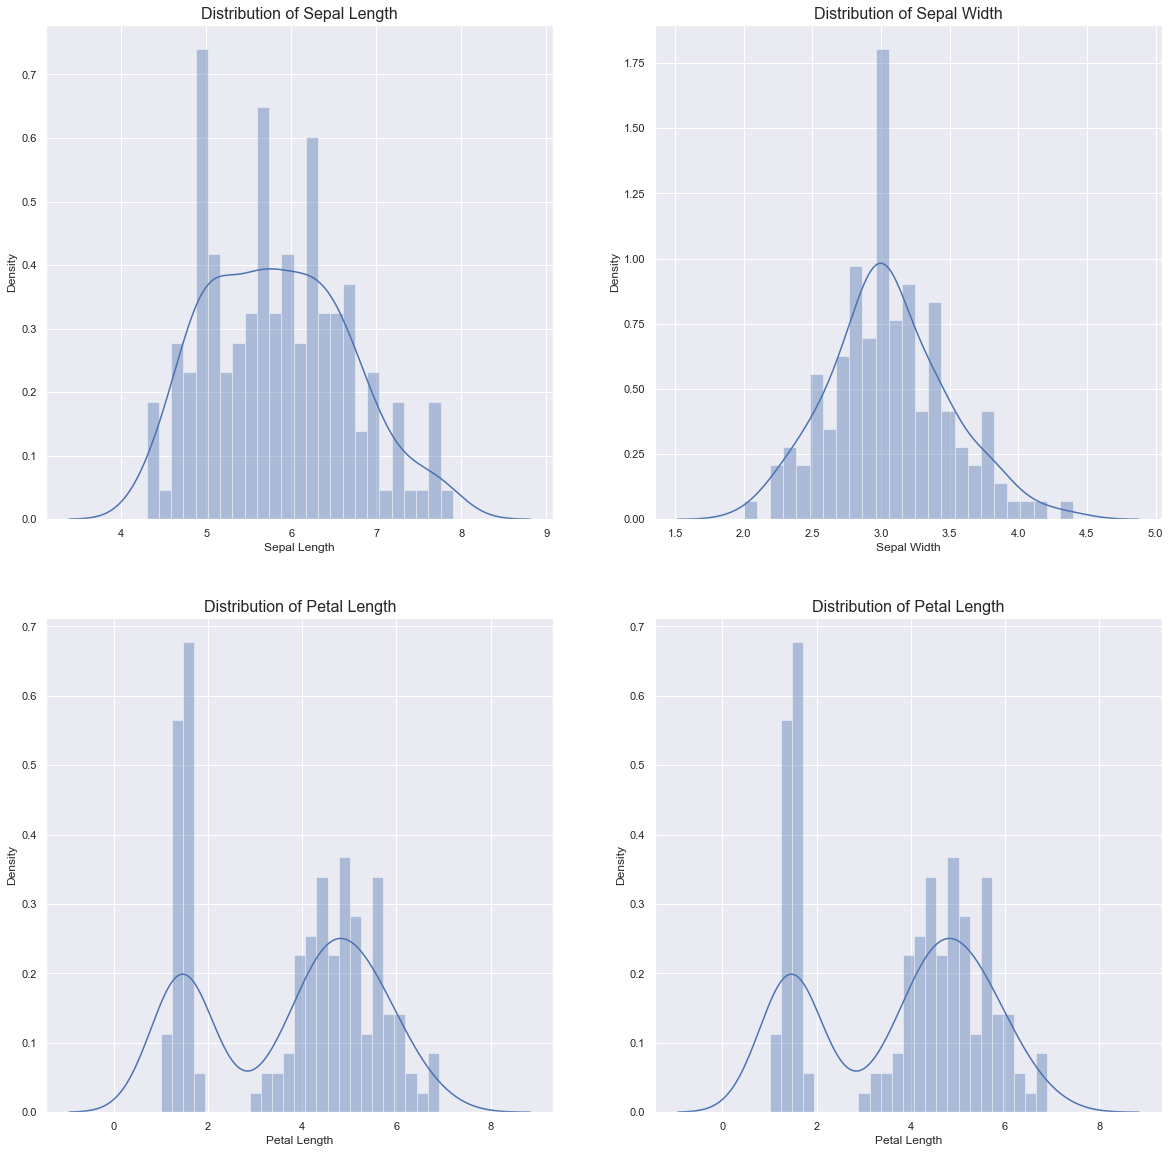

In [8]:
# Let's see the distribution of the two variable from our data
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 1 (2 row, 2 columns, fourth plot)

# Subplot 1: Distribution plot of 'Sepal Length'
k1 = sns.distplot(iris_df['sepal_length'], bins=25, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Sepal Length', fontsize=16)
ax0.set(xlabel= 'Sepal Length', ylabel= 'Density')

# Subplot 2: Distribution plot of 'Sepal Width'
k2 = sns.distplot(iris_df['sepal_width'], bins=25, ax=ax1) # add to subplot 2
ax1.set_title('Distribution of Sepal Width', fontsize=16)
ax1.set(xlabel= 'Sepal Width', ylabel= 'Density')

# Subplot 1: Distribution plot of 'Petal Length'
k1 = sns.distplot(iris_df['petal_length'], bins=25, ax=ax2) # add to subplot 3
ax2.set_title('Distribution of Petal Length', fontsize=16)
ax2.set(xlabel= 'Petal Length', ylabel= 'Density')

# Subplot 1: Distribution plot of 'Petal Length'
k1 = sns.distplot(iris_df['petal_length'], bins=25, ax=ax3) # add to subplot 4
ax3.set_title('Distribution of Petal Length', fontsize=16)
ax3.set(xlabel= 'Petal Length', ylabel= 'Density')

plt.show()

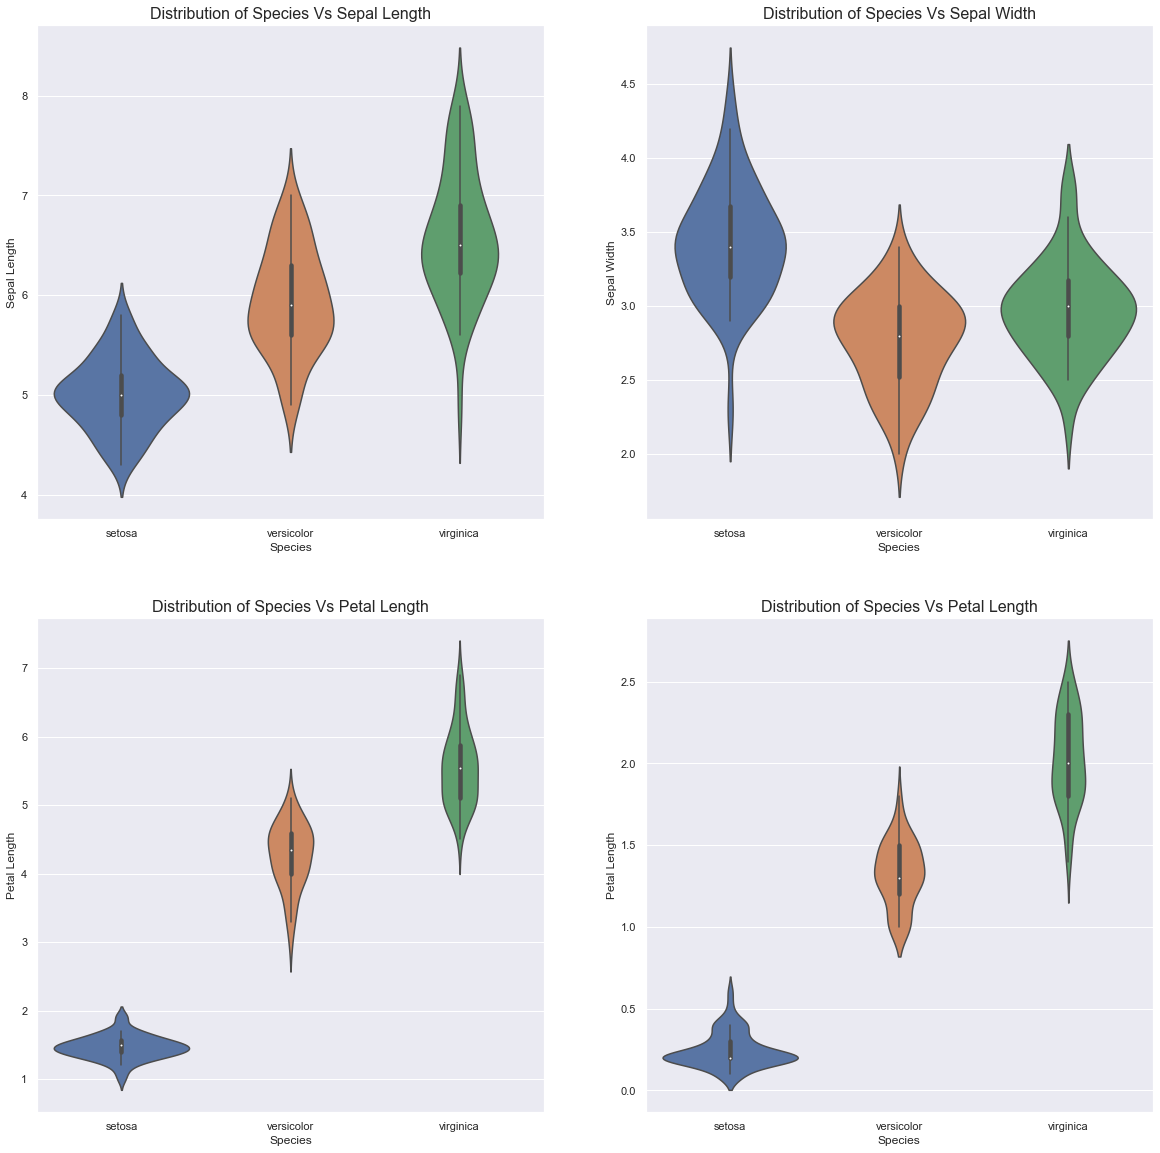

In [9]:
# Let's see the distribution of the two variable from our data
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 1 (2 row, 2 columns, fourth plot)

# Subplot 1: Distribution plot of 'Species Vs Sepal Length'
k1 = sns.violinplot(data= iris_df, x= 'species', y= 'sepal_length', ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Species Vs Sepal Length', fontsize=16)
ax0.set(xlabel= 'Species', ylabel= 'Sepal Length')

# Subplot 2: Distribution plot of 'Species Vs Sepal Length'
k2 = sns.violinplot(data= iris_df, x= 'species', y= 'sepal_width', ax=ax1) # add to subplot 2           
ax1.set_title('Distribution of Species Vs Sepal Width', fontsize=16)
ax1.set(xlabel= 'Species', ylabel= 'Sepal Width')

# Subplot 1: Distribution plot of 'Species Vs Sepal Length'
k1 = sns.violinplot(data= iris_df, x= 'species', y= 'petal_length', ax=ax2) # add to subplot 3
ax2.set_title('Distribution of Species Vs Petal Length', fontsize=16)
ax2.set(xlabel= 'Species', ylabel= 'Petal Length')

# Subplot 1: Distribution plot of 'Species Vs Sepal Length'
k1 = sns.violinplot(data= iris_df, x= 'species', y= 'petal_width', ax=ax3) # add to subplot 4
ax3.set_title('Distribution of Species Vs Petal Length', fontsize=16)
ax3.set(xlabel= 'Species', ylabel= 'Petal Length')

plt.show()

* The graphs reveal a smaller mean Petal length and width for the Setosa class and quite a bit of variation between the three classess.
* On the other  hand, there is less variation with Sepal length and width.

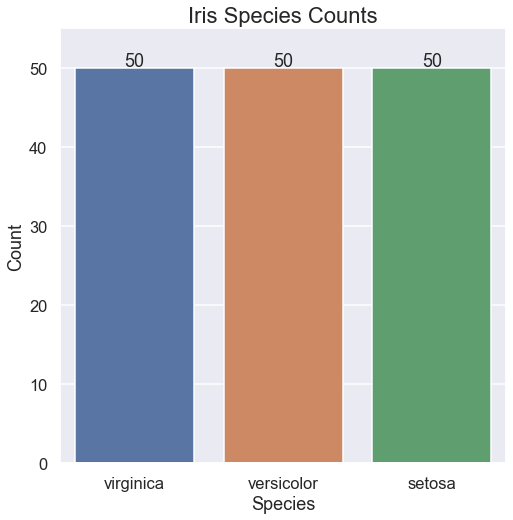

In [10]:
plt.figure(figsize=(8,8))
sns.set_context("talk")

order1 = iris_df['species'].value_counts().index
sns.countplot(data = iris_df, x = 'species', order = order1)
plt.xlabel('Species')
plt.ylabel('Count')
plt.ylim(0,55)
plt.title('Iris Species Counts', fontsize=22)
order2 = iris_df['species'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{}'.format(count)
    plt.text(i,count + 0.2, strt, ha='center')

The species column contains 3 species of iris flower namely virginica, versicolor and setosa each 50 in number.

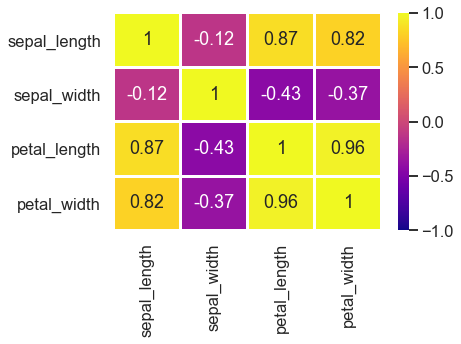

In [11]:
# A Heatmap is also helpful when used with corr() to look for correlation
sns.heatmap(data = iris_df.corr(), annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)

- Petal Lenght is highly related with Petal Width. They have positive correlation between them which is <b>0.96</b>.

In [12]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

In [13]:
x[:6]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

<h4>How do you find the optimum number of clusters for K Means? How does one determine the value of K?</h4>

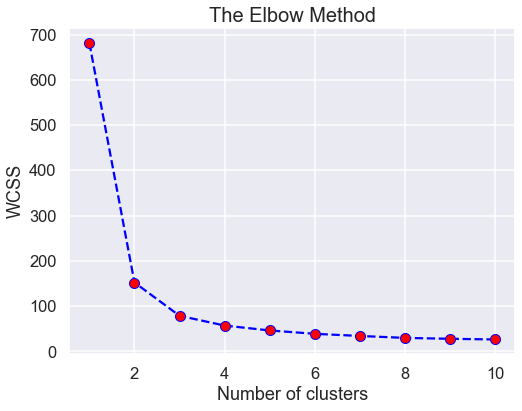

In [14]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, color='blue', linestyle='dashed', marker='o', \
         markerfacecolor='red', markersize=10)
plt.title('The Elbow Method', fontsize= 20)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

<UL>
<li>You can clearly see why it is called <b>'The elbow method'</b> from the above graph, the optimum clusters is where the elbow        occurs. This is when the within 'cluster sum of squares' (WCSS) doesn't decrease significantly with every iteration.</li><br>
<li>From this we choose the number of clusters as '<b>3</b>'.</li>
</UL>

In [15]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', \
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

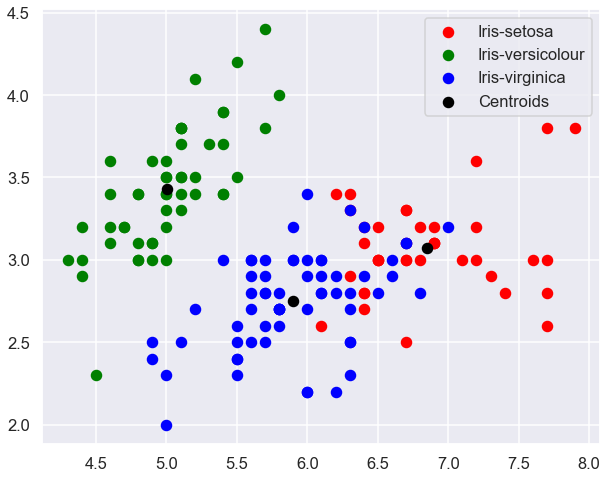

In [17]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()

This concludes the K-Means Notebook.

# Thank You!